In [114]:

import csv 
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree



In [115]:
#Leemos los csv de las tablas 
nodes = pd.read_csv('../Tablas/TablaAtributos.csv')
nodesNoCentrality = pd.read_csv('../Tablas/TablaNoCentrality.csv')
nodesNoClustering = pd.read_csv('../Tablas/TablaNoClustering.csv')
nodesNoCommunities = pd.read_csv('../Tablas/TablaNoCommunities.csv')
nodesNoKCore = pd.read_csv('../Tablas/TablaNoKCore.csv')

In [116]:
ad=['name']
ac=['Closeness_Centrality','Betweenness_Centrality','Degree_Centrality','Clustering_Coefficient','Triangles','Squares','K_Core', 'Comunidad','asyn_lpa_community']
atributtes = nodes.loc[:, ['id']+ad+ac]

ad_NoCentrality=['name']
ac_NoCentrality=['Clustering_Coefficient','Triangles','Squares','K_Core', 'Comunidad','asyn_lpa_community']
atributtesNoCentrality = nodesNoCentrality.loc[:, ['id']+ad_NoCentrality+ac_NoCentrality]

ad_NoClustering=['name']
ac_NoClustering=['Closeness_Centrality','Betweenness_Centrality','Degree_Centrality','Triangles','Squares','K_Core', 'Comunidad','asyn_lpa_community']
atributtesNoClustering = nodesNoClustering.loc[:, ['id']+ad_NoClustering+ac_NoClustering]

ad_NoCommunities=['name']
ac_NoCommunities=['Closeness_Centrality','Betweenness_Centrality','Degree_Centrality','Clustering_Coefficient','Triangles','Squares','K_Core']
atributtesNoCommunities = nodesNoCommunities.loc[:, ['id']+ad_NoCommunities+ac_NoCommunities]

ad_NoKCore=['name']
ac_NoKCore=['Closeness_Centrality','Betweenness_Centrality','Degree_Centrality','Clustering_Coefficient','Triangles','Squares','Comunidad','asyn_lpa_community']
atributtesNoKCore = nodesNoKCore.loc[:, ['id']+ad_NoKCore+ac_NoKCore]

#Elegimos el objetivo 
y = nodes['ml_target']

In [117]:
#Manipulación de datos 
#Para ello, usamos OrdinalEncoder
codificador_ad= OrdinalEncoder()
codificador_ad.fit(atributtes[ad])
codificador_ad.fit(atributtesNoCentrality[ad_NoCentrality])
codificador_ad.fit(atributtesNoClustering[ad_NoClustering])
codificador_ad.fit(atributtesNoCommunities[ad_NoCommunities])
codificador_ad.fit(atributtesNoKCore[ad_NoKCore])

OrdinalEncoder()

In [118]:
#Transformamos los datos
atributtes[ad] = codificador_ad.transform(atributtes[ad])
atributtesNoCentrality[ad_NoCentrality] = codificador_ad.transform(atributtesNoCentrality[ad_NoCentrality])
atributtesNoClustering[ad_NoClustering] = codificador_ad.transform(atributtesNoClustering[ad_NoClustering])
atributtesNoCommunities[ad_NoCommunities] = codificador_ad.transform(atributtesNoCommunities[ad_NoCommunities])
atributtesNoKCore[ad_NoKCore] = codificador_ad.transform(atributtesNoKCore[ad_NoKCore])


In [119]:
#Normalizamos name 
scaler = MinMaxScaler(
    feature_range=(0, 1)
)
atributtes['name'] = scaler.fit_transform(atributtes[['name']])
atributtesNoCentrality['name'] = scaler.fit_transform(atributtesNoCentrality[['name']])
atributtesNoClustering['name'] = scaler.fit_transform(atributtesNoClustering[['name']])
atributtesNoCommunities['name'] = scaler.fit_transform(atributtesNoCommunities[['name']])
atributtesNoKCore['name'] = scaler.fit_transform(atributtesNoKCore[['name']])

In [120]:
#Validacion 
#Para ello, dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(atributtes, y, test_size=0.2, random_state=42)

In [121]:
#Como hemos calculado los mejoreS hiperparametros, los usamos para entrenar el modelo
clf = DecisionTreeClassifier(
    max_depth=5,
     min_samples_split=5,
    random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

In [122]:
#Predecimos
y_pred = clf.predict(X_test)
confusionM=confusion_matrix(y_test, y_pred)
print(confusionM)
recall_All=recall_score(y_test, y_pred)
print(recall_All)

[[5077  479]
 [ 918 1066]]
0.5372983870967742


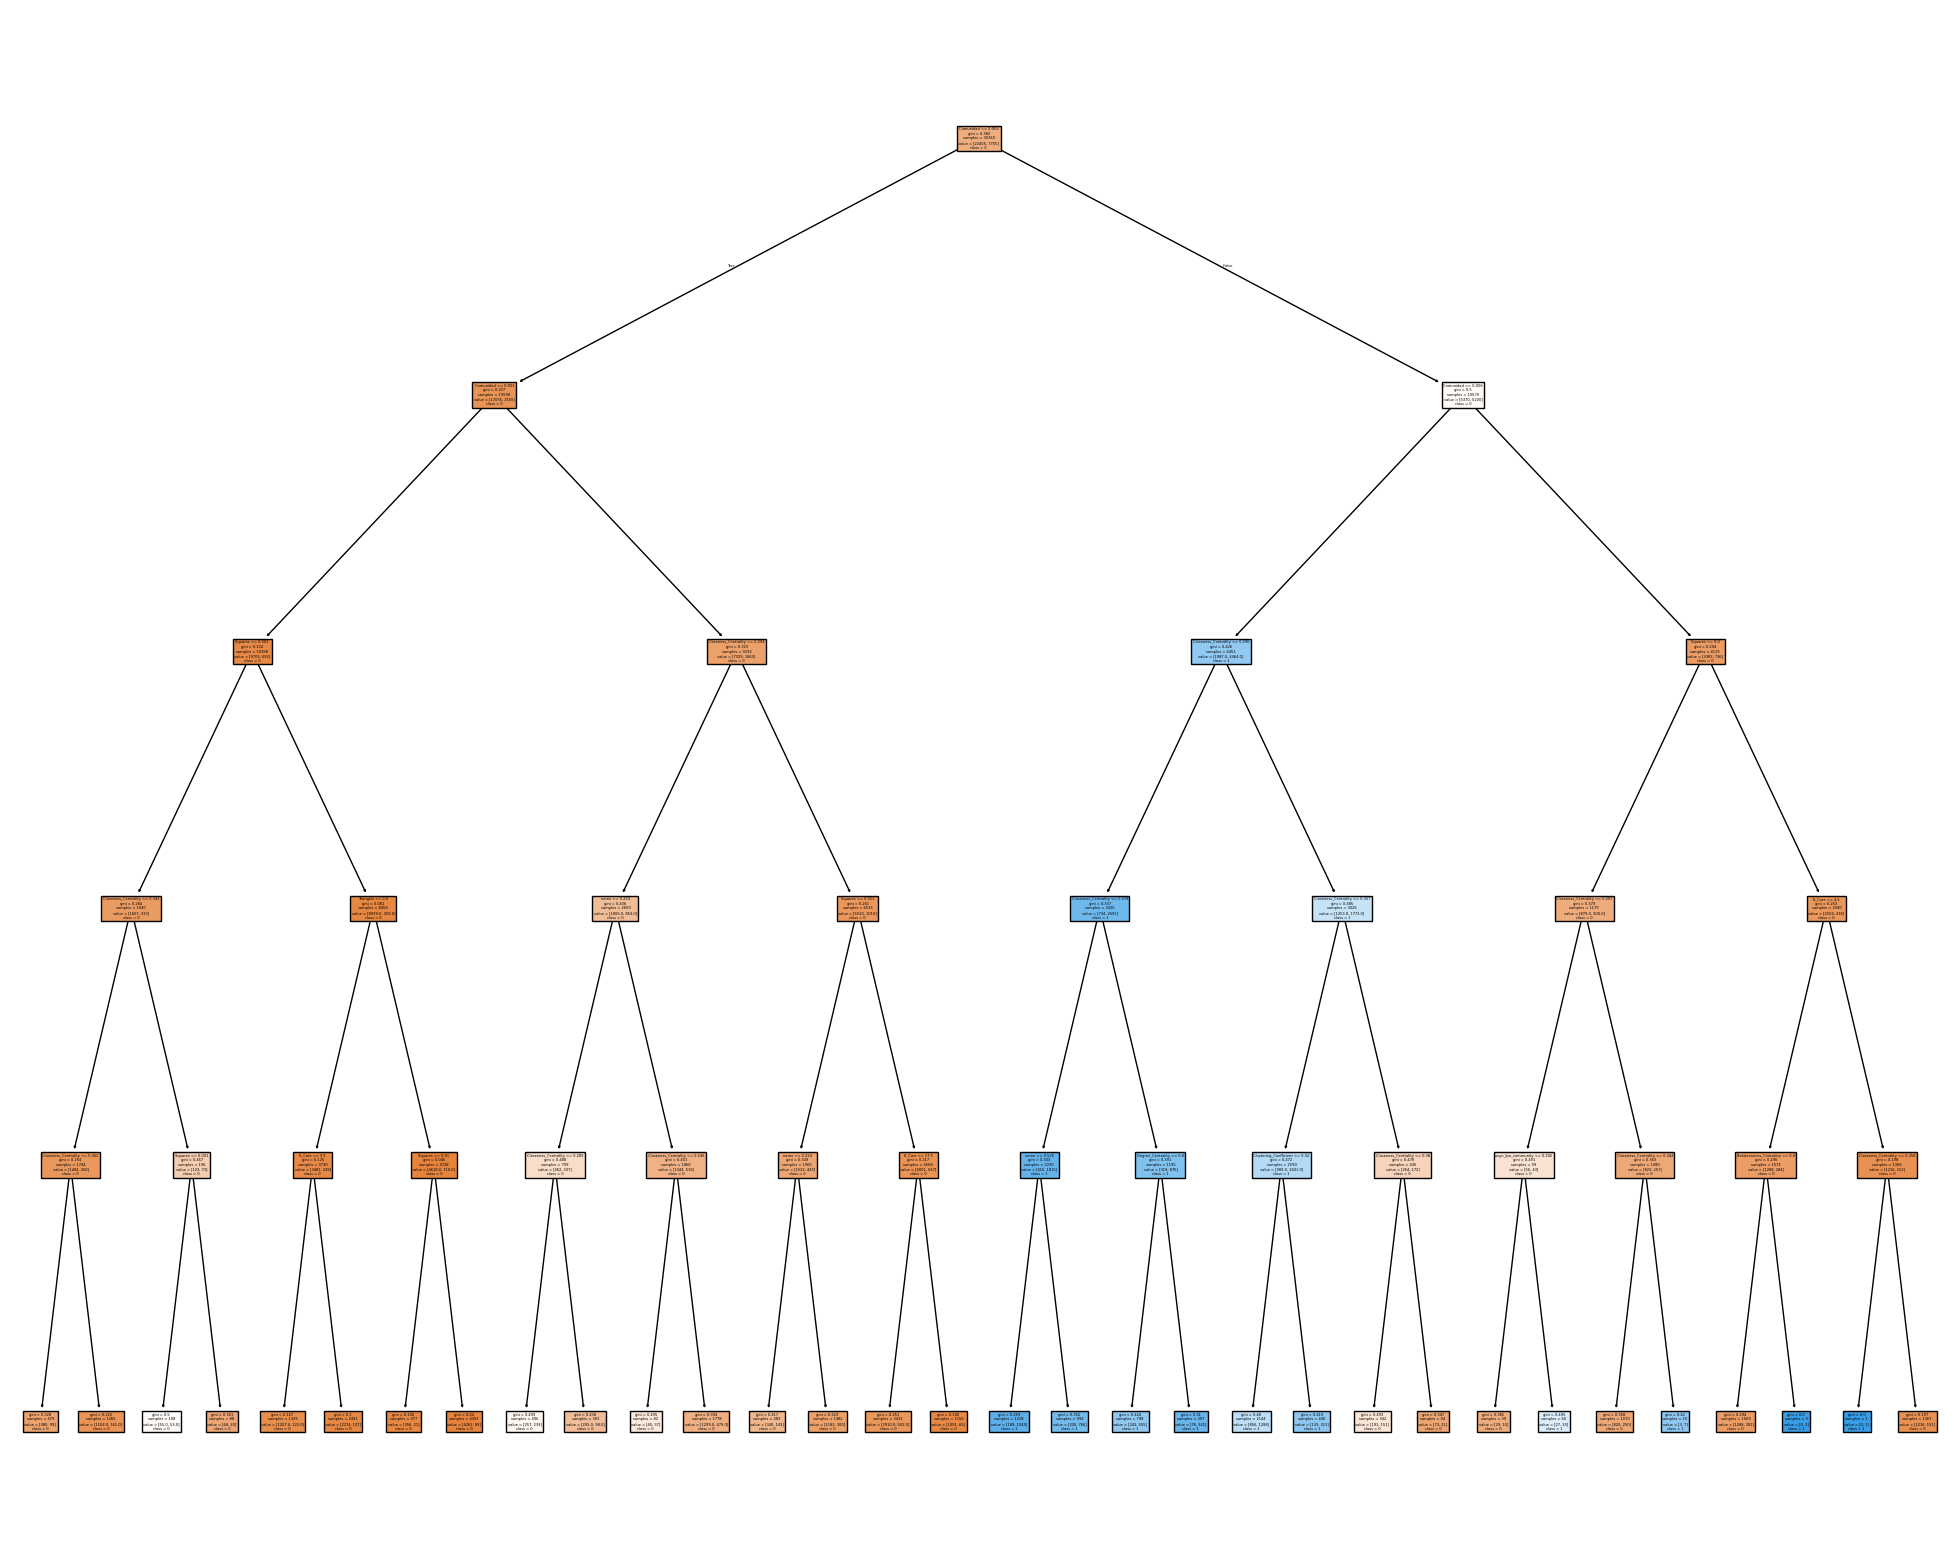

In [123]:
#Figura
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=atributtes.columns,  
                   class_names=['0', '1'],
                   filled=True)

In [124]:
#SIN CENTRALITY
(X_train, X_test, y_train, y_test) = train_test_split(atributtesNoCentrality, y, test_size=0.2, random_state=42)


In [125]:
#Como hemos calculado los mejoreS hiperparametros, los usamos para entrenar el modelo
clf = DecisionTreeClassifier(
    max_depth=5,
     min_samples_split=5,
    random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

In [126]:
#Predecimos
y_pred = clf.predict(X_test)
confusionM=confusion_matrix(y_test, y_pred)
print(confusionM)
recall_No_Centrality=recall_score(y_test, y_pred)
print(recall_No_Centrality)

[[5045  511]
 [ 904 1080]]
0.5443548387096774


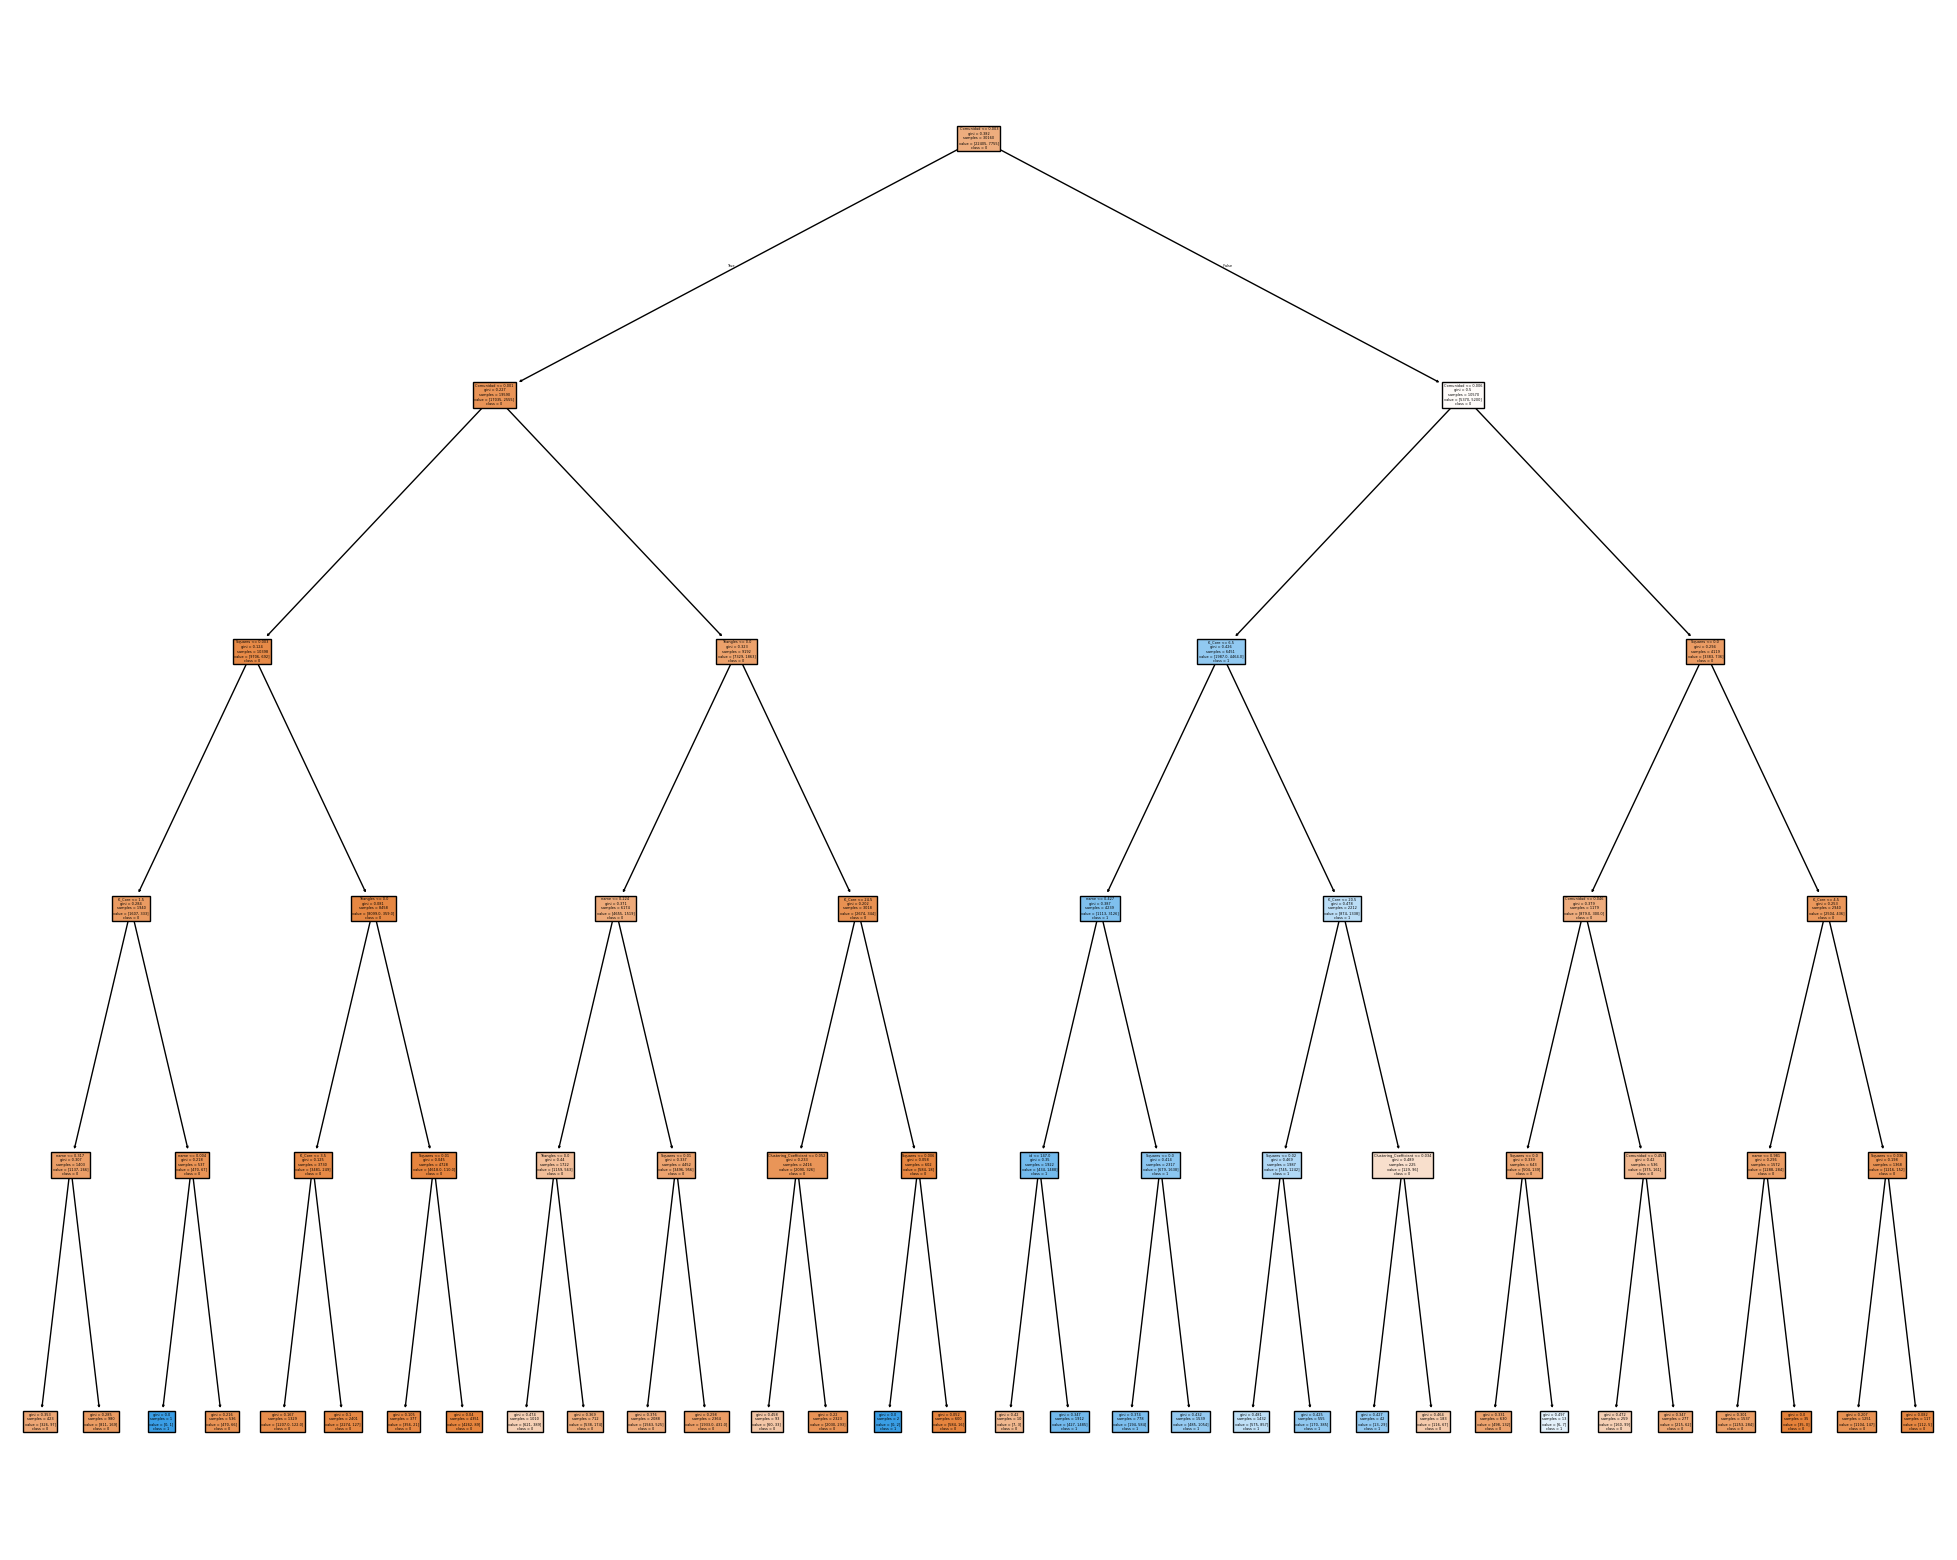

In [127]:
#Figura
fig= plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=atributtesNoCentrality.columns,  
                   class_names=['0', '1'],
                   filled=True)



In [128]:
#SIN CLUSTERING
(X_train, X_test, y_train, y_test) = train_test_split(atributtesNoClustering, y, test_size=0.2, random_state=42)


In [129]:
#Como hemos calculado los mejoreS hiperparametros, los usamos para entrenar el modelo
clf = DecisionTreeClassifier(
    max_depth=5,
     min_samples_split=5,
    random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

In [130]:
#Predecimos
y_pred = clf.predict(X_test)
confusionM=confusion_matrix(y_test, y_pred)
print(confusionM)
recall_No_Clustering=recall_score(y_test, y_pred)
print(recall_No_Clustering)

[[5077  479]
 [ 918 1066]]
0.5372983870967742


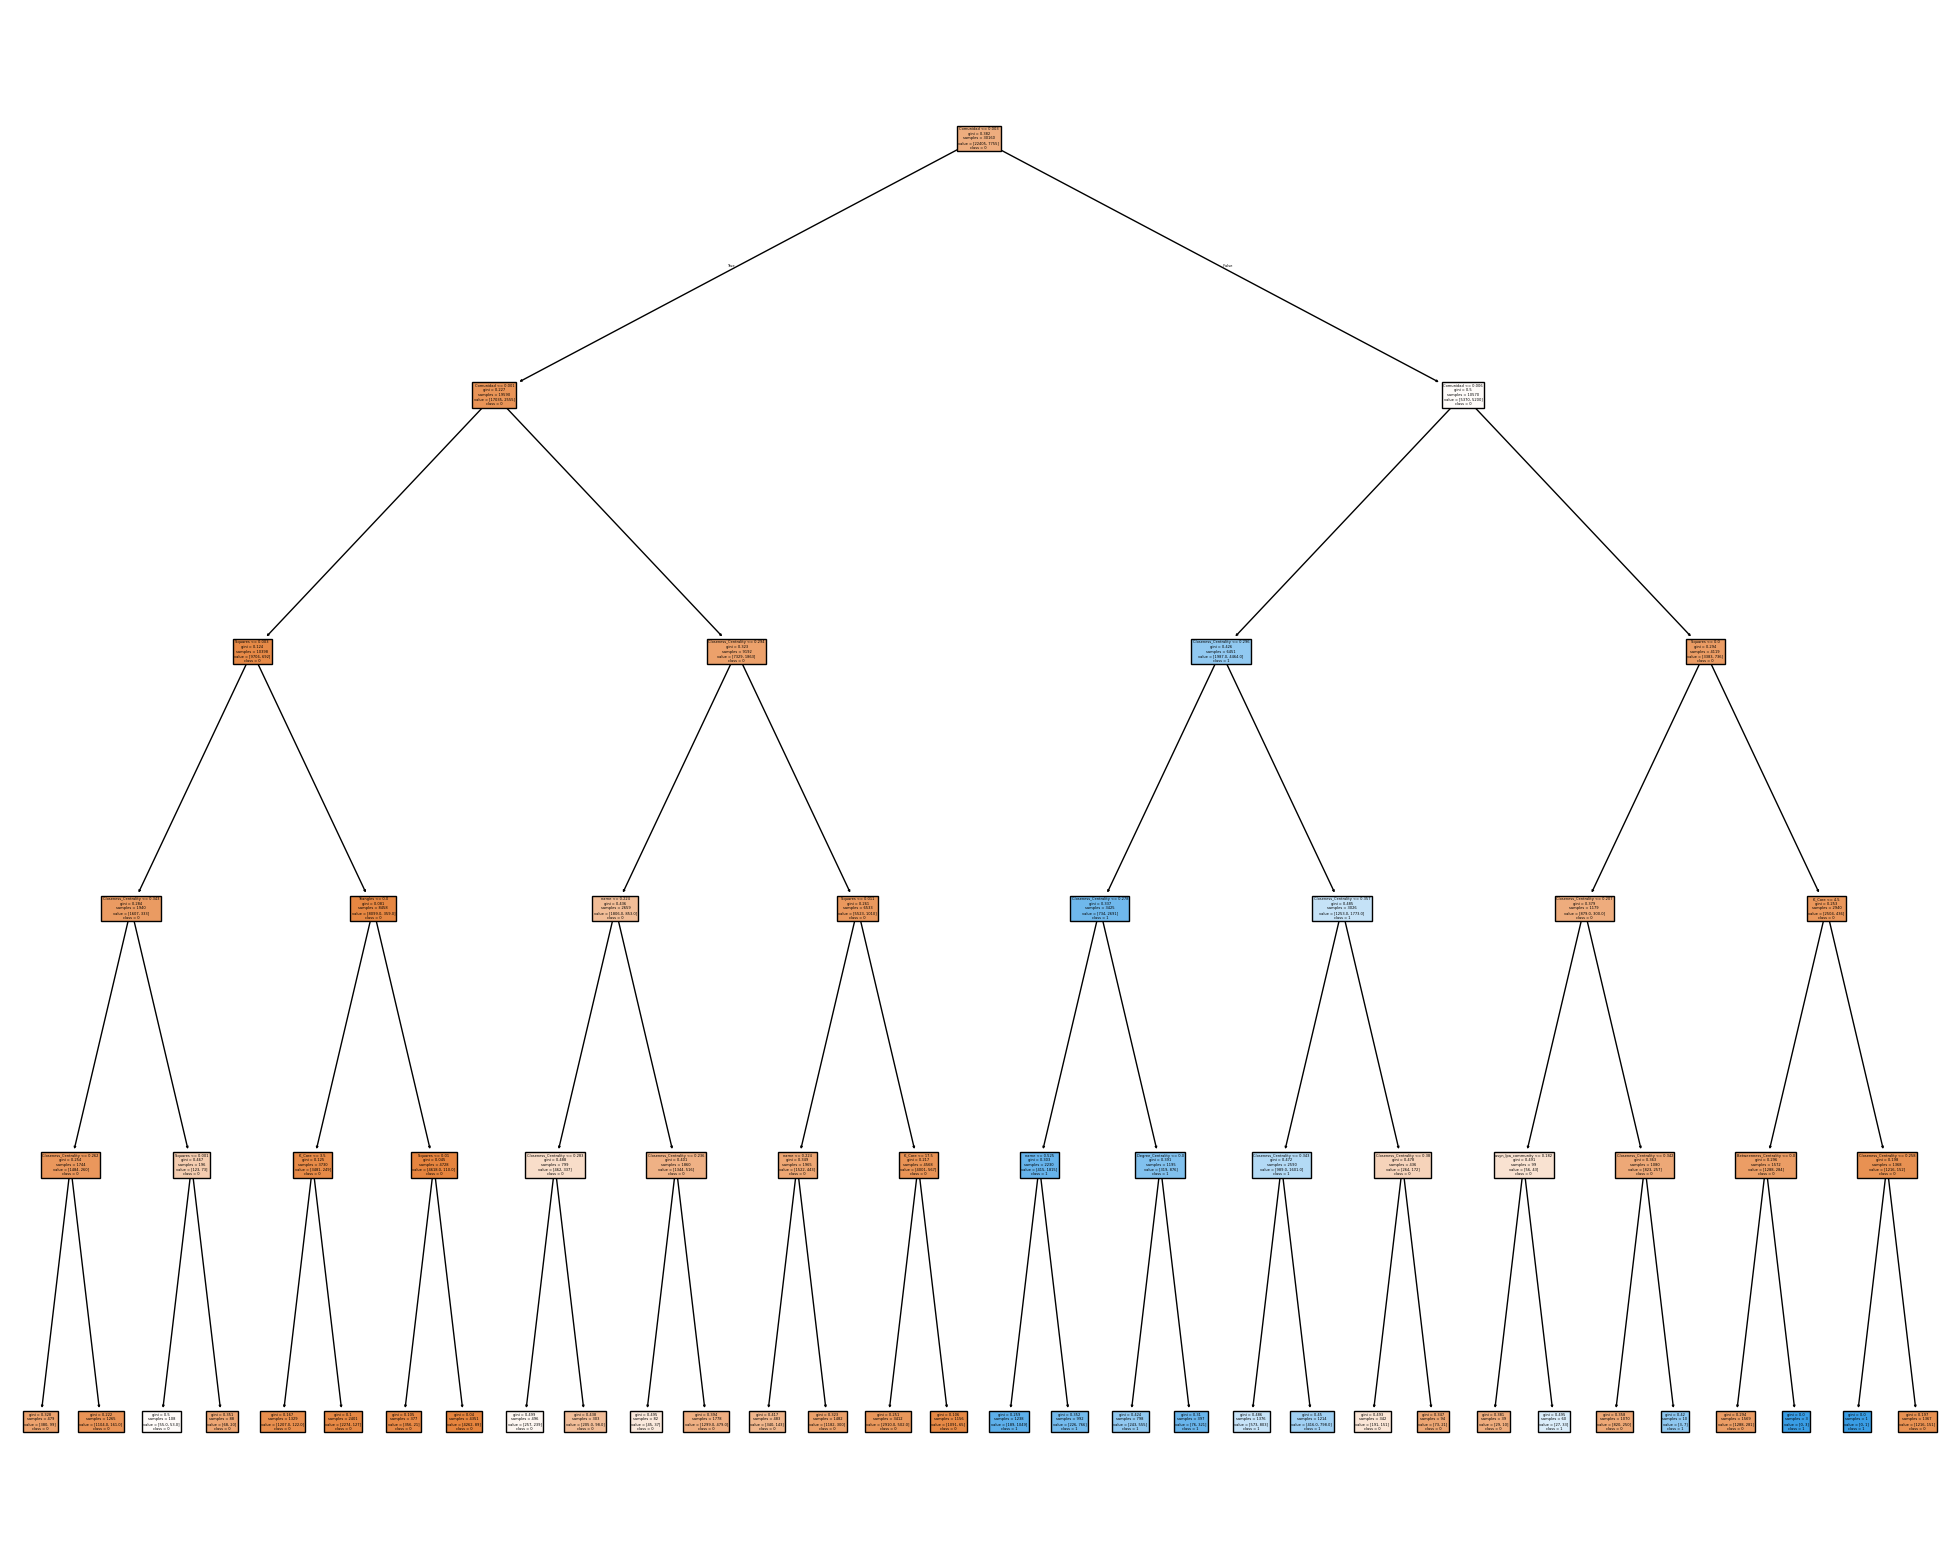

In [131]:
#Figura
fig= plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=atributtesNoClustering.columns,  
                   class_names=['0', '1'],
                   filled=True)

In [132]:
#SIN COMMUNITIES
(X_train, X_test, y_train, y_test) = train_test_split(atributtesNoCommunities, y, test_size=0.2, random_state=42)


In [133]:
#Como hemos calculado los mejoreS hiperparametros, los usamos para entrenar el modelo
clf = DecisionTreeClassifier(
    max_depth=5,
     min_samples_split=5,
    random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

In [134]:
#Predecimos
y_pred = clf.predict(X_test)
confusionM=confusion_matrix(y_test, y_pred)
print(confusionM)
recall_No_Communities=recall_score(y_test, y_pred)
print(recall_No_Communities)

[[5261  295]
 [1636  348]]
0.17540322580645162


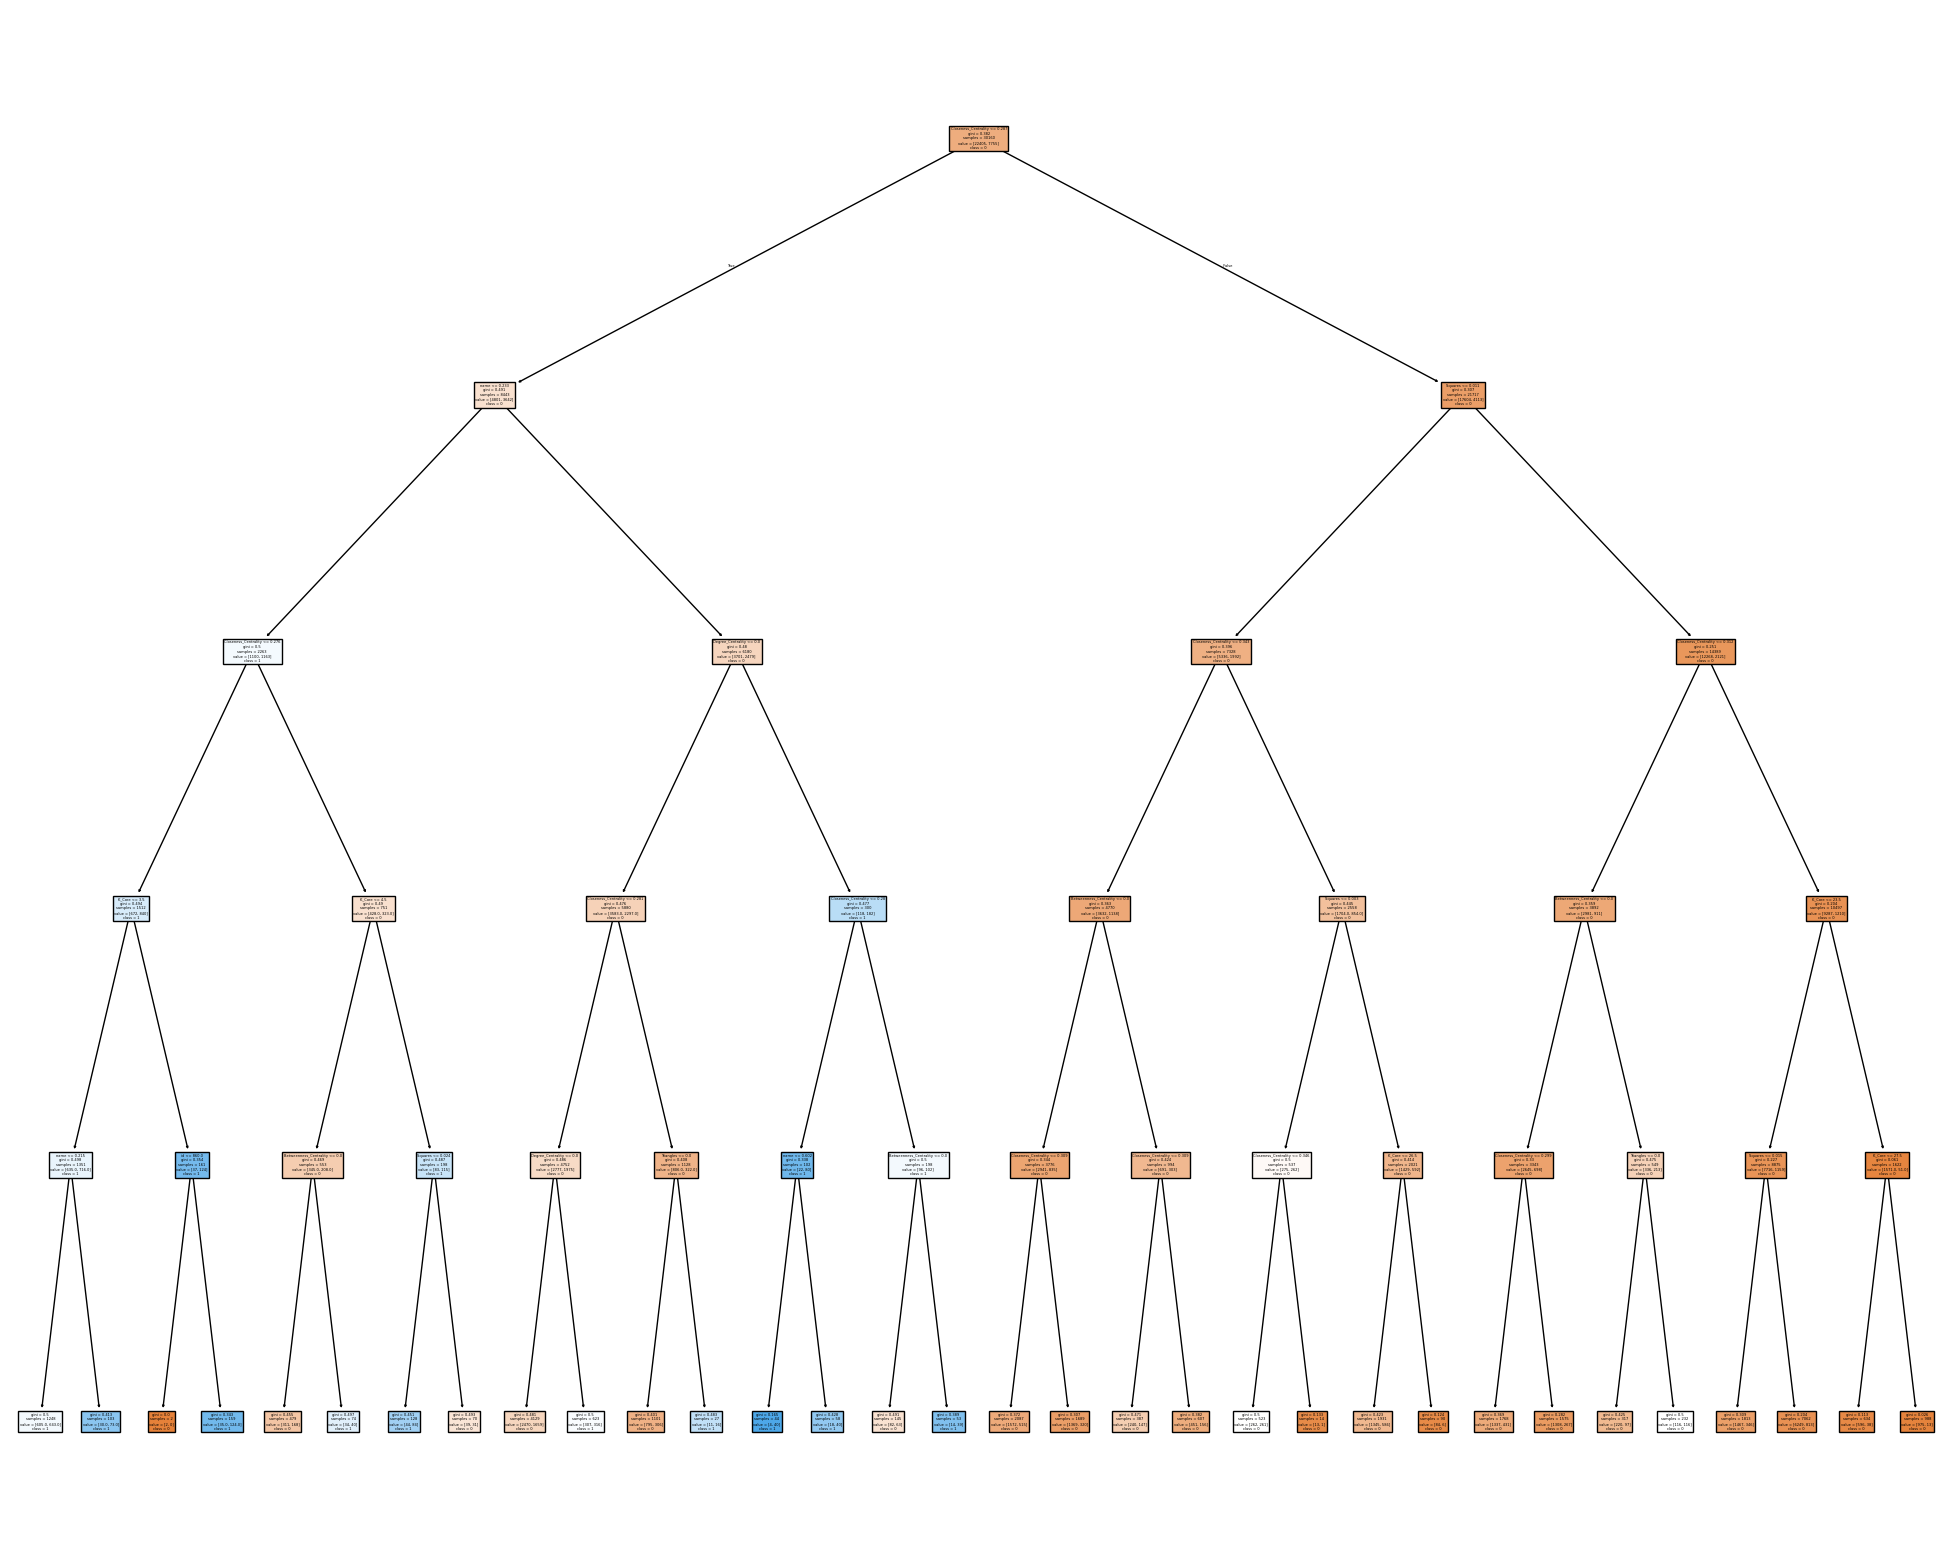

In [135]:
#Figura
fig= plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=atributtesNoCommunities.columns,  
                   class_names=['0', '1'],
                   filled=True)


In [136]:
#SIN KCORE
(X_train, X_test, y_train, y_test) = train_test_split(atributtesNoKCore, y, test_size=0.2, random_state=42)


In [137]:
#Como hemos calculado los mejoreS hiperparametros, los usamos para entrenar el modelo
clf = DecisionTreeClassifier(
    max_depth=5,
     min_samples_split=5,
    random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)

In [138]:
#Predecimos
y_pred = clf.predict(X_test)
confusionM=confusion_matrix(y_test, y_pred)
print(confusionM)
recall_No_KCORE=recall_score(y_test, y_pred)
print(recall_No_KCORE)


[[5077  479]
 [ 919 1065]]
0.5367943548387096


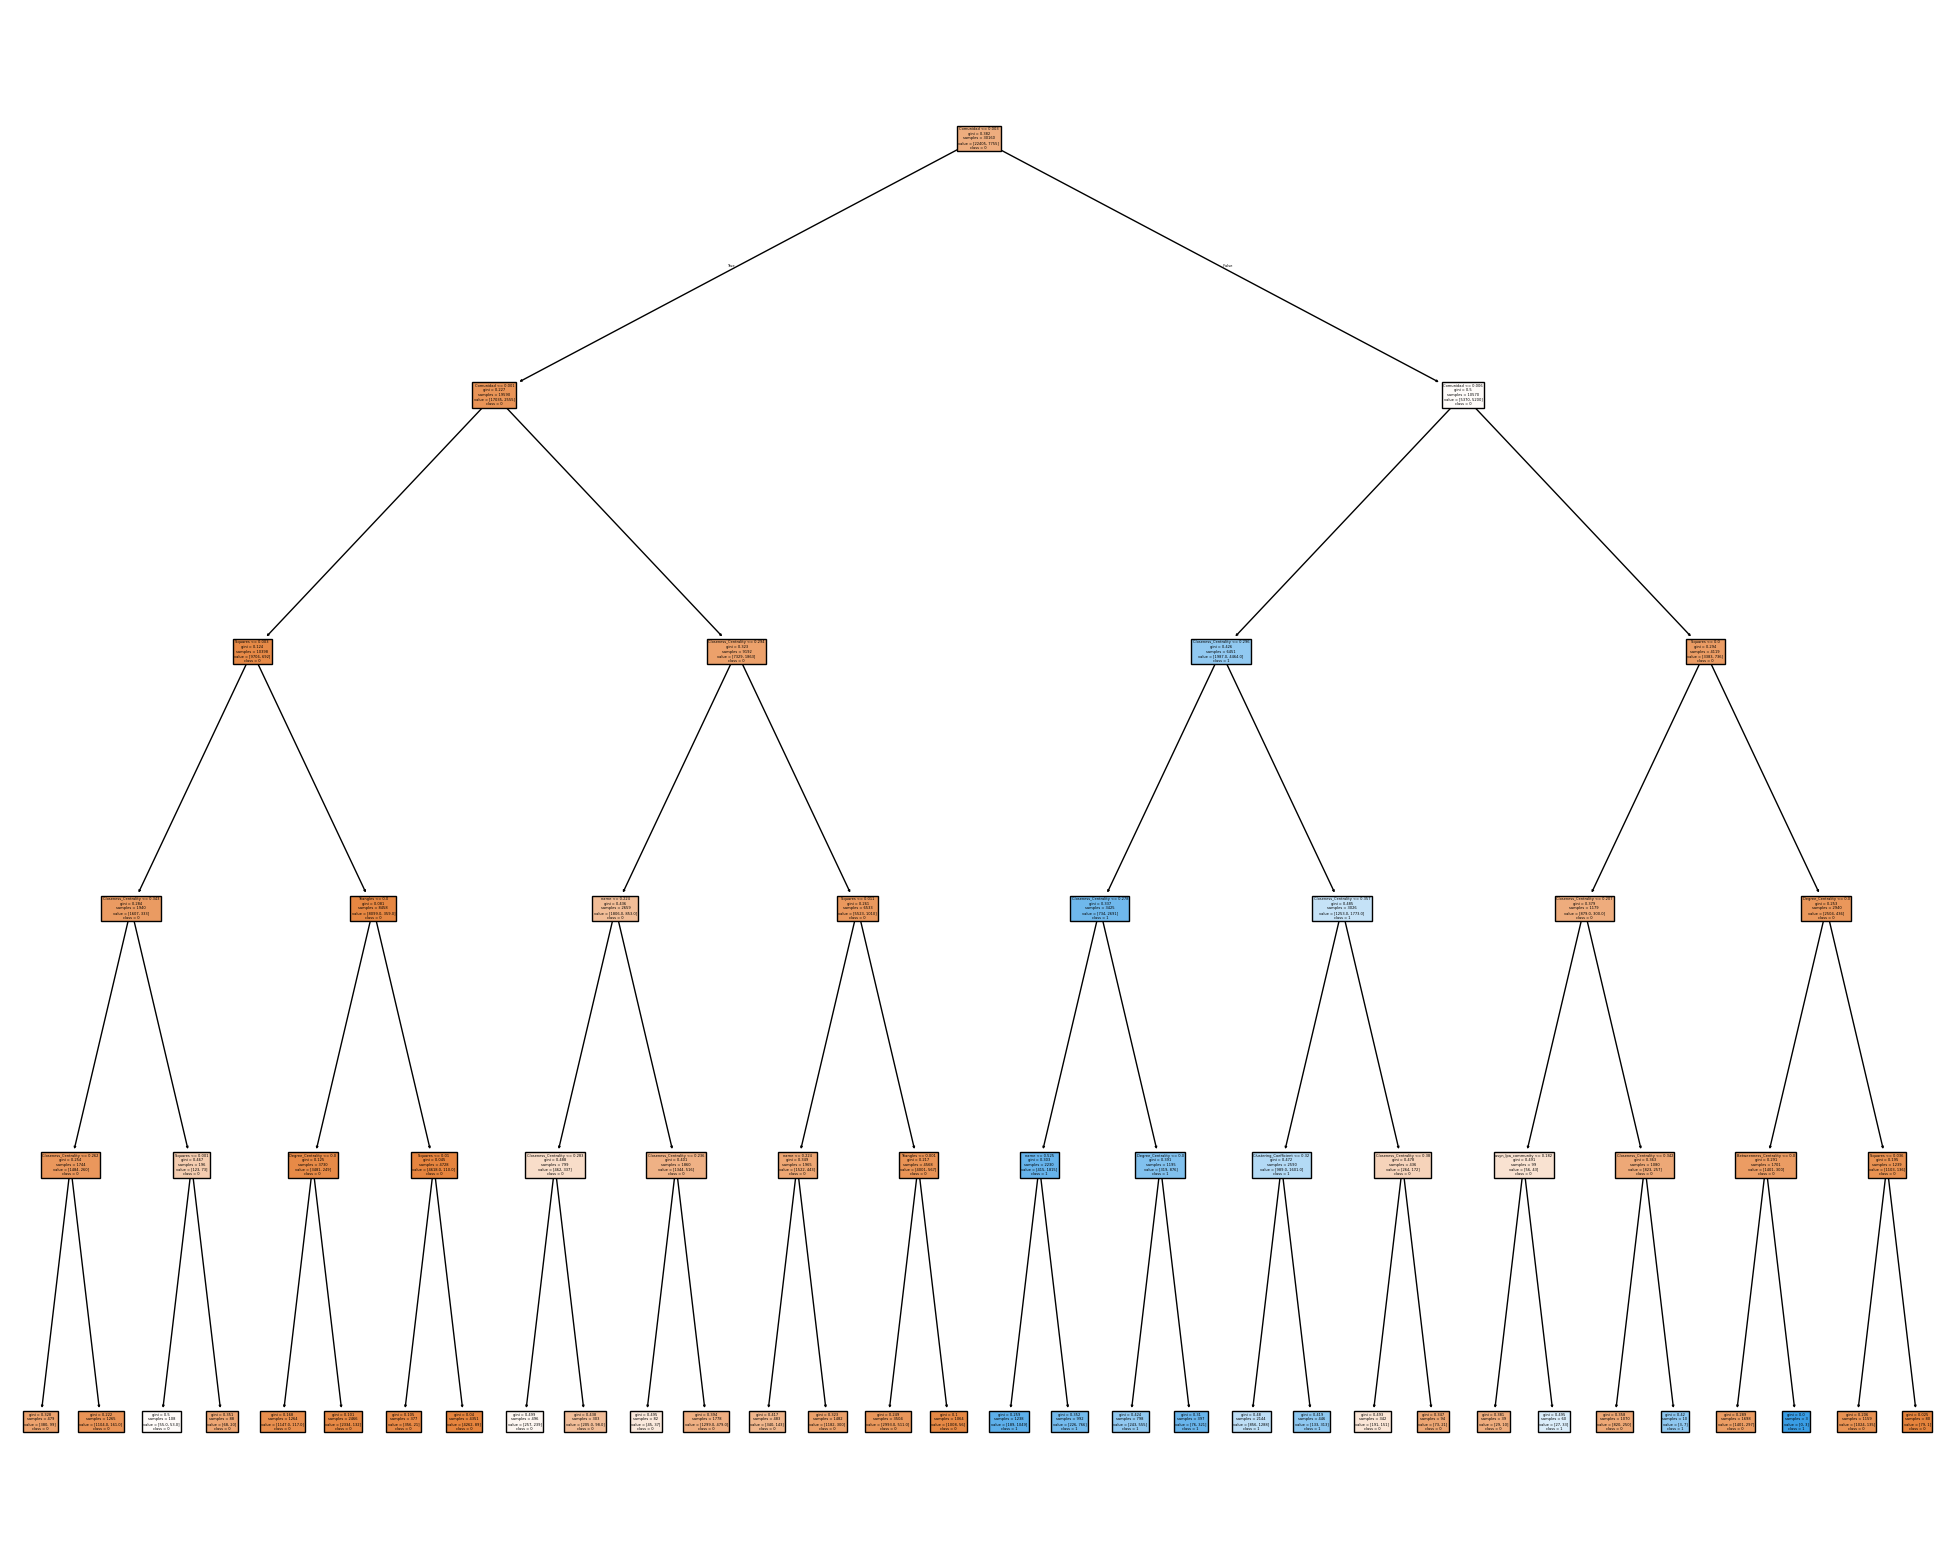

In [139]:
#Figura
fig= plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=atributtesNoKCore.columns,  
                   class_names=['0', '1'],
                   filled=True)


In [141]:
print("Recall con todos los atributos: ", recall_All)
print("Recall sin centralidad: ", recall_No_Centrality)
print("Recall sin clustering: ", recall_No_Clustering)
print("Recall sin communities: ", recall_No_Communities)
print("Recall sin kcore: ", recall_No_KCORE)

Recall con todos los atributos:  0.5372983870967742
Recall sin centralidad:  0.5443548387096774
Recall sin clustering:  0.5372983870967742
Recall sin communities:  0.17540322580645162
Recall sin kcore:  0.5367943548387096


In [142]:
#Analisis
#Podemos observar que el recall es mejor cuando se eliminan los atributos de centralidad y clustering
#Por lo tanto, estos atributos no son utiles para predecir la variable objetivo
#Por otro lado, el recall es peor cuando se eliminan los atributos de communities y kcore
#Por lo tanto, estos atributos son utiles para predecir la variable objetivo
#En resumen, los atributos utiles para predecir la variable objetivo son communities y kcore
#Por lo tanto, se deberian de tener en cuenta estos atributos para predecir la variable objetivo
#En general , este modelo no es muy bueno para predecir la variable objetivo, ya que el recall es muy bajo
